In [1]:
import time
from functools import partial

import elfi
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from elfi.examples.gauss import gauss, ss_mean, ss_var, euclidean_multidim, gauss_nd_mean

import logging
logging.basicConfig(level=logging.INFO)  # sometimes this is required to enable logging inside Jupyter

%matplotlib inline
%precision 2

# Set an arbitrary seed and a global random state to keep the randomly generated quantities the same between runs
seed = 20180620
np.random.seed(seed)
N = 1000

### Plotting Gauss

In [2]:
def get_model(n_obs=50, true_params=None, seed_obs=None, nd_mean=False, cov_matrix=None):
    """Return a Gaussian noise model.

    Parameters
    ----------
    n_obs : int, optional
    true_params : list, optional
        Default parameter settings.
    seed_obs : int, optional
        Seed for the observed data generation.
    nd_mean : bool, optional
        Option to use an n-D mean Gaussian noise model.
    cov_matrix : array_like, optional
        Covariance matrix, a requirement for the nd_mean model.

    Returns
    -------
    elfi.ElfiModel

    """
    # Defining the default settings.
    if true_params is None:
        if nd_mean:
            true_params = [4, 4]  # 2-D mean.
        else:
            true_params = [4, .4]  # mean and standard deviation.

    # Choosing the simulator for both observations and simulations.
    if nd_mean:
        fn_simulator = partial(gauss_nd_mean, cov_matrix=cov_matrix, n_obs=n_obs)
    else:
        fn_simulator = partial(gauss, n_obs=n_obs)


    # Obtaining the observations.
    y_obs = fn_simulator(*true_params, n_obs=n_obs, random_state=np.random.RandomState(seed_obs))

    m = elfi.new_model()
    # Initialising the priors.
    eps_prior = 5  # The longest distance from the median of an initialised prior's distribution.
    priors = []
    if nd_mean:
        n_dim = len(true_params)
        for i in range(n_dim):
            name_prior = 'mu_{}'.format(i)
            prior_mu = elfi.Prior('uniform', true_params[i] - eps_prior,
                                  2 * eps_prior, model=m, name=name_prior)
            priors.append(prior_mu)
    else:
        priors.append(elfi.Prior('uniform', true_params[0] - eps_prior,
                                 2 * eps_prior, model=m, name='mu'))
        priors.append(elfi.Prior('truncnorm', np.amax([.01, true_params[1] - eps_prior]),
                                 2 * eps_prior, model=m, name='sigma'))
    elfi.Simulator(fn_simulator, *priors, observed=y_obs, name='gauss')

    # Initialising the summary statistics.
    sumstats = []
    sumstats.append(elfi.Summary(ss_mean, m['gauss'], name='ss_mean'))
    sumstats.append(elfi.Summary(ss_var, m['gauss'], name='ss_var'))

    # Choosing the discrepancy metric.
    if nd_mean:
        elfi.Discrepancy(euclidean_multidim, *sumstats, name='d')
    else:
        elfi.Distance('euclidean', *sumstats, name='d')
    return m

### Plotting 1-d Gaussian noise model

In [3]:
true_mu_1d = [4]
cov_matrix_1d = [1]

In [4]:
m_1d = get_model(true_params=true_mu_1d, nd_mean=True, cov_matrix=cov_matrix_1d, seed_obs=seed)

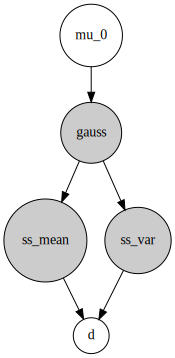

In [5]:
elfi.draw(m_1d['d'])

In [6]:
rej_1d = elfi.Rejection(m_1d['d'], batch_size=N, seed=seed)

In [7]:
result_1d = rej_1d.sample(N)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [8]:
# result_1d.save_sample()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f08c7cce080>],
      dtype=object)

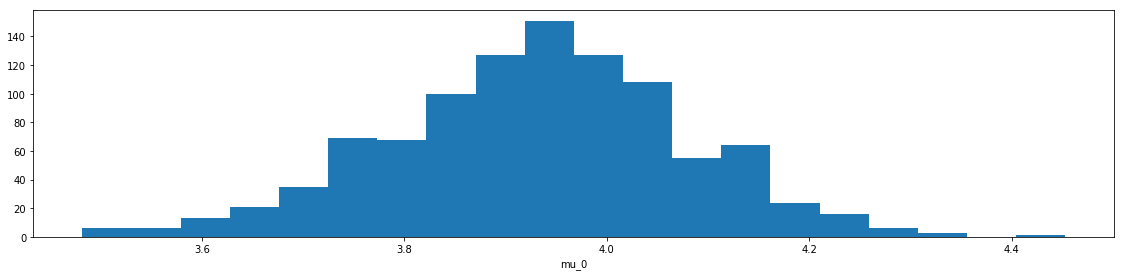

In [9]:
result_1d.plot_marginals()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08a23c2d68>]],
      dtype=object)

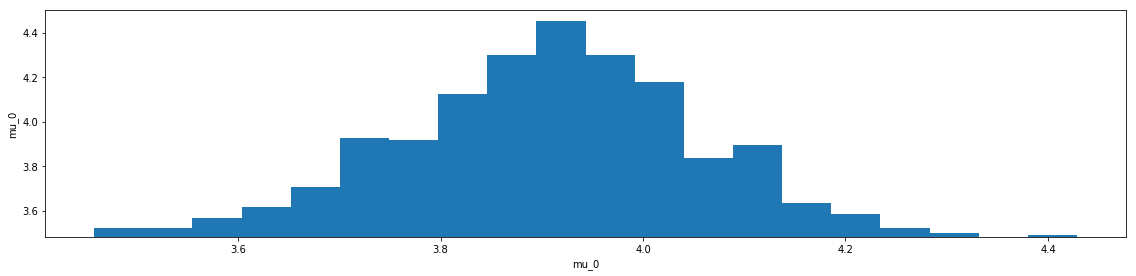

In [10]:
result_1d.plot_pairs()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f089030e160>],
      dtype=object)

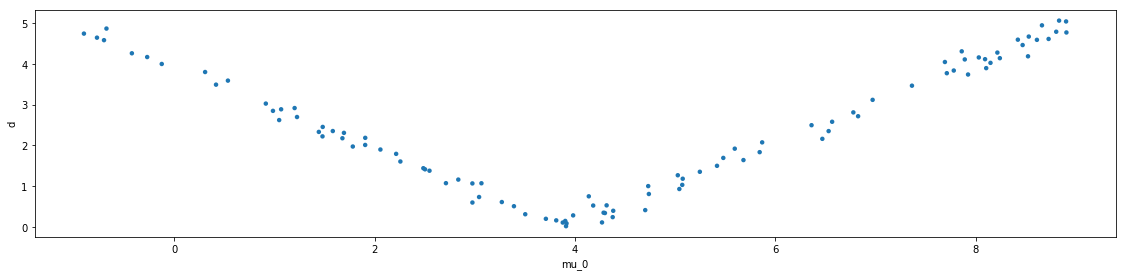

In [62]:
elfi.plot_params_vs_node(m_1d['d'])

### Plotting 2-D Gaussian model

In [11]:
true_mu_2d = [2, 3]
cov_matrix_2d = [3, 4]

In [12]:
m_2d = get_model(true_params=true_mu_2d, nd_mean=True, cov_matrix=cov_matrix_2d, seed_obs=seed)

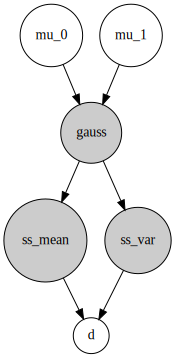

In [13]:
elfi.draw(m_2d['d'])

In [14]:
rej_2d = elfi.Rejection(m_2d['d'], batch_size=N, seed=seed)

In [15]:
result_2d = rej_2d.sample(N)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [16]:
# result_2d.save_sample()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f08c691e7f0>,
      dtype=object)

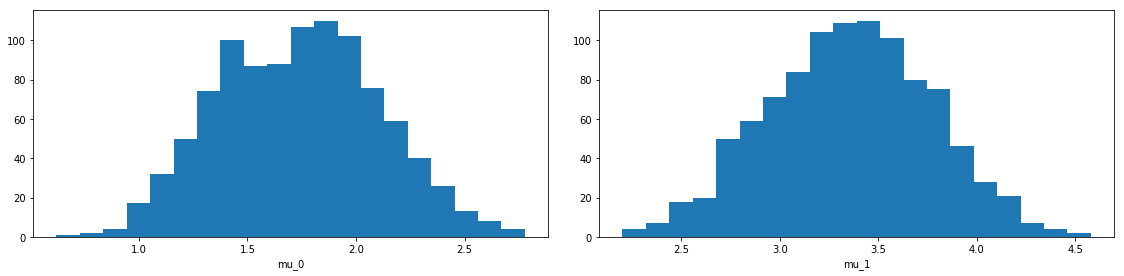

In [17]:
result_2d.plot_marginals()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08c6802b00>,
      dtype=object)

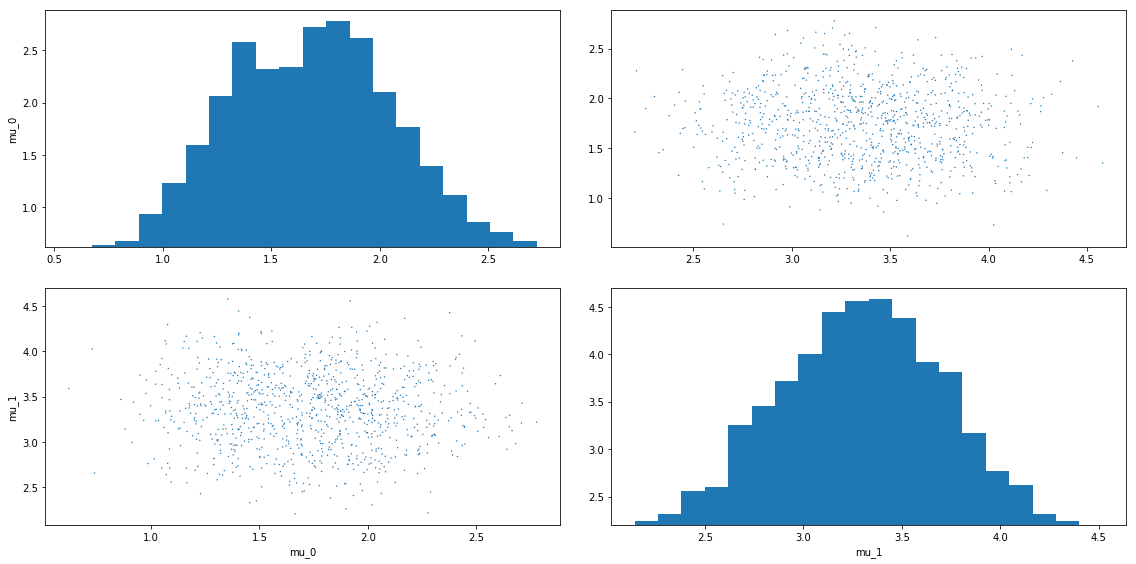

In [18]:
result_2d.plot_pairs()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f08904cf940>,
      dtype=object)

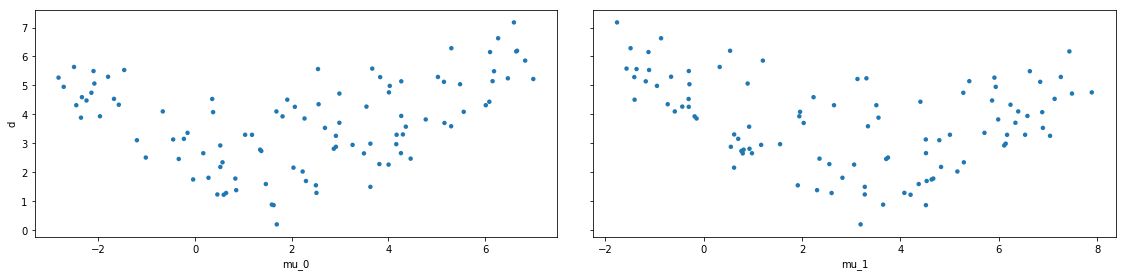

In [63]:
elfi.plot_params_vs_node(m_2d['d'])

### Plotting 3-D Gaussian model

In [19]:
true_mu_3d = [2, 5, 6]
cov_matrix_3d = [3, 4, 7]

In [20]:
m_3d = get_model(true_params=true_mu_3d, nd_mean=True, cov_matrix=cov_matrix_3d, seed_obs=seed)

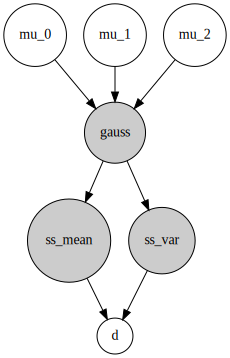

In [21]:
elfi.draw(m_3d['d'])

In [22]:
rej_3d = elfi.Rejection(m_3d['d'], batch_size=N, seed=seed)

In [23]:
result_3d = rej_3d.sample(N)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [24]:
# result_3d.save_sample()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f08c6649dd8>,
      dtype=object)

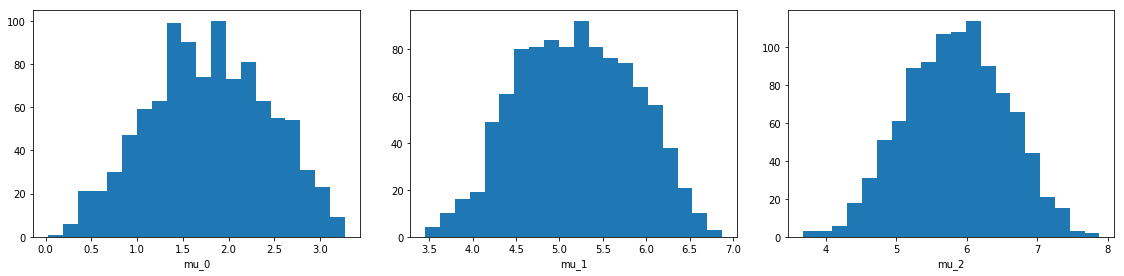

In [25]:
result_3d.plot_marginals()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08c727c6a0>,
      dtype=object)

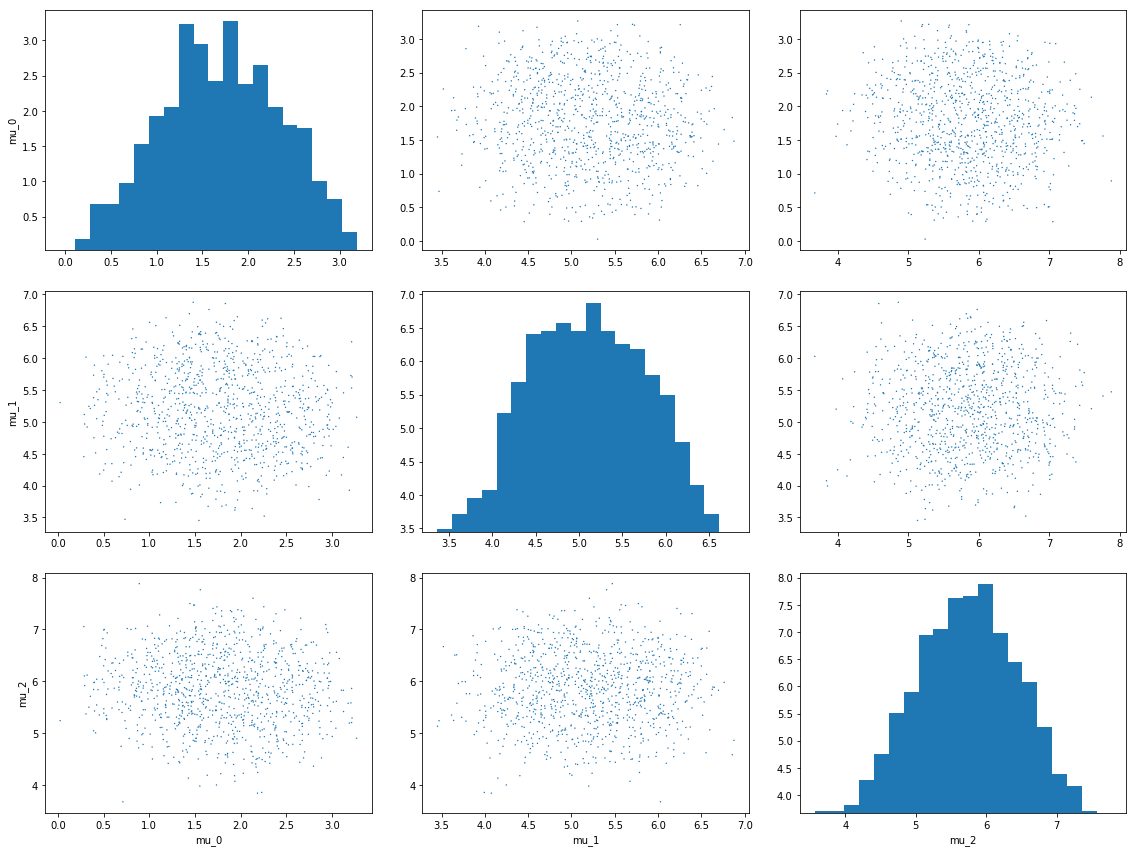

In [26]:
result_3d.plot_pairs()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f088f8ce6d8>,
      dtype=object)

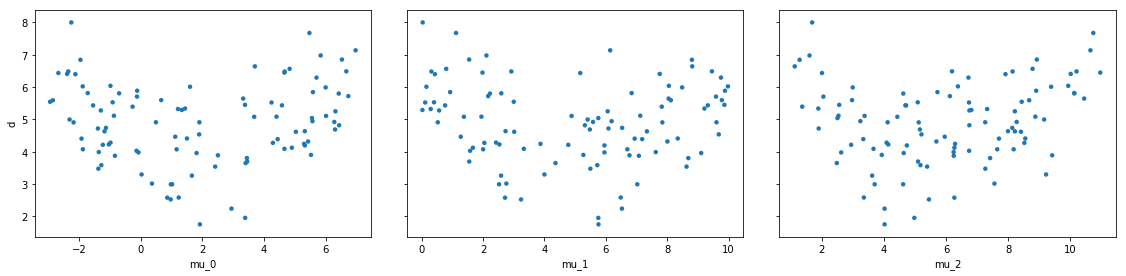

In [64]:
elfi.plot_params_vs_node(m_3d['d'])

### Plotting 4-D Gaussian model

In [27]:
true_mu_4d = [2, 4, 6, 8]
cov_matrix_4d = [1, 3, 5, 7]

In [28]:
m_4d = get_model(true_params=true_mu_4d, nd_mean=True, cov_matrix=cov_matrix_4d, seed_obs=seed)

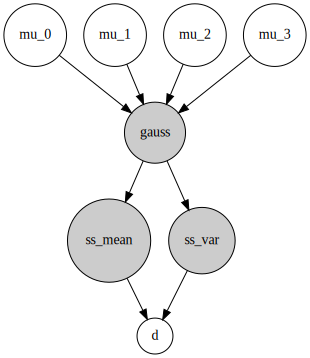

In [29]:
elfi.draw(m_4d['d'])

In [30]:
rej_4d = elfi.Rejection(m_4d['d'], batch_size=N, seed=seed)

In [31]:
result_4d = rej_4d.sample(N)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f08c659ce10>,
      dtype=object)

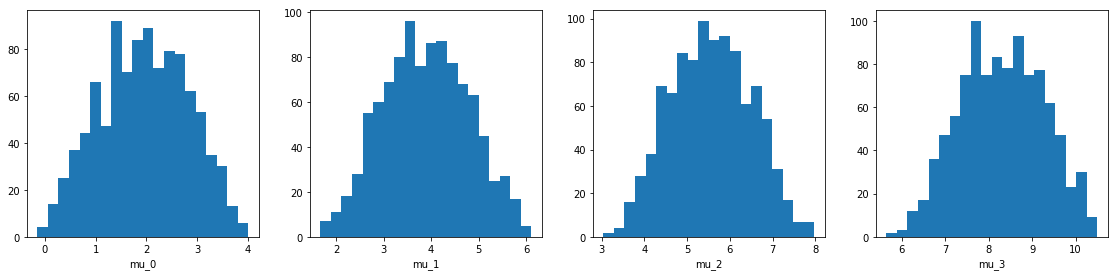

In [32]:
result_4d.plot_marginals()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08c4bf2710>,
      dtype=object)

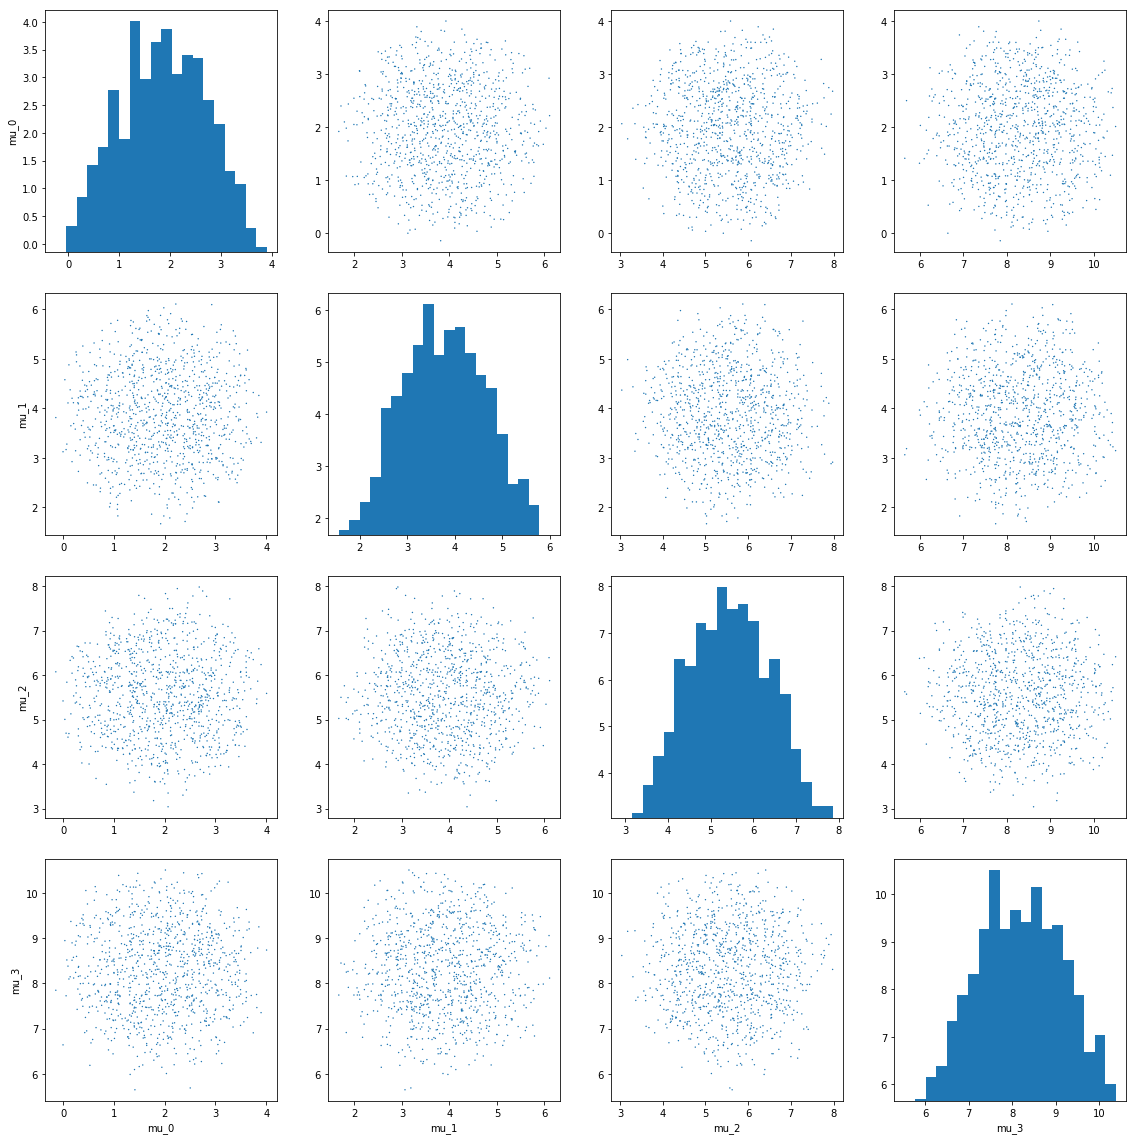

In [33]:
result_4d.plot_pairs()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f088f79cc88>,
      dtype=object)

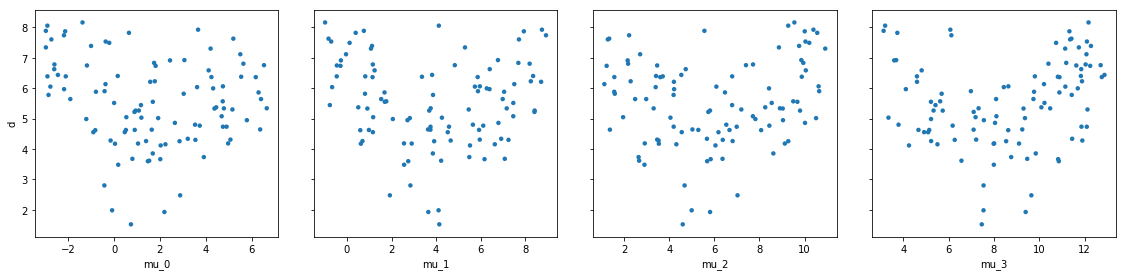

In [65]:
elfi.plot_params_vs_node(m_4d['d'])

### Plotting 5-D Gaussian model

In [34]:
true_mu_5d = [2, 4, 6, 8, 9]
cov_matrix_5d = [1, 3, 5, 7, 10]

In [35]:
m_5d = get_model(true_params=true_mu_5d, nd_mean=True, cov_matrix=cov_matrix_5d, seed_obs=seed)

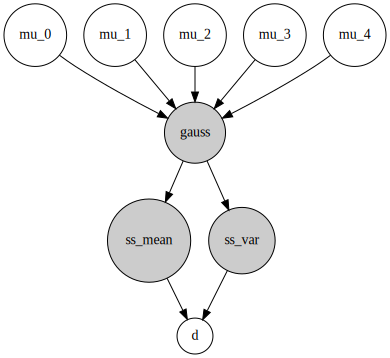

In [36]:
elfi.draw(m_5d['d'])

In [37]:
rej_5d = elfi.Rejection(m_5d['d'], batch_size=N, seed=seed)

In [38]:
result_5d = rej_5d.sample(N)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f08c4b84400>,
      dtype=object)

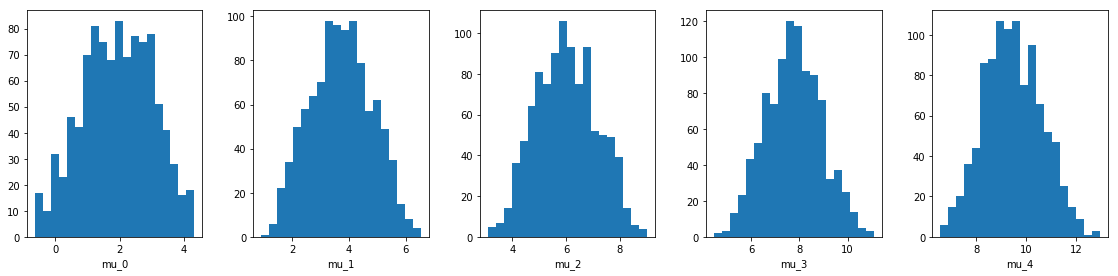

In [39]:
result_5d.plot_marginals()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08c7951a58>,
      dtype=object)

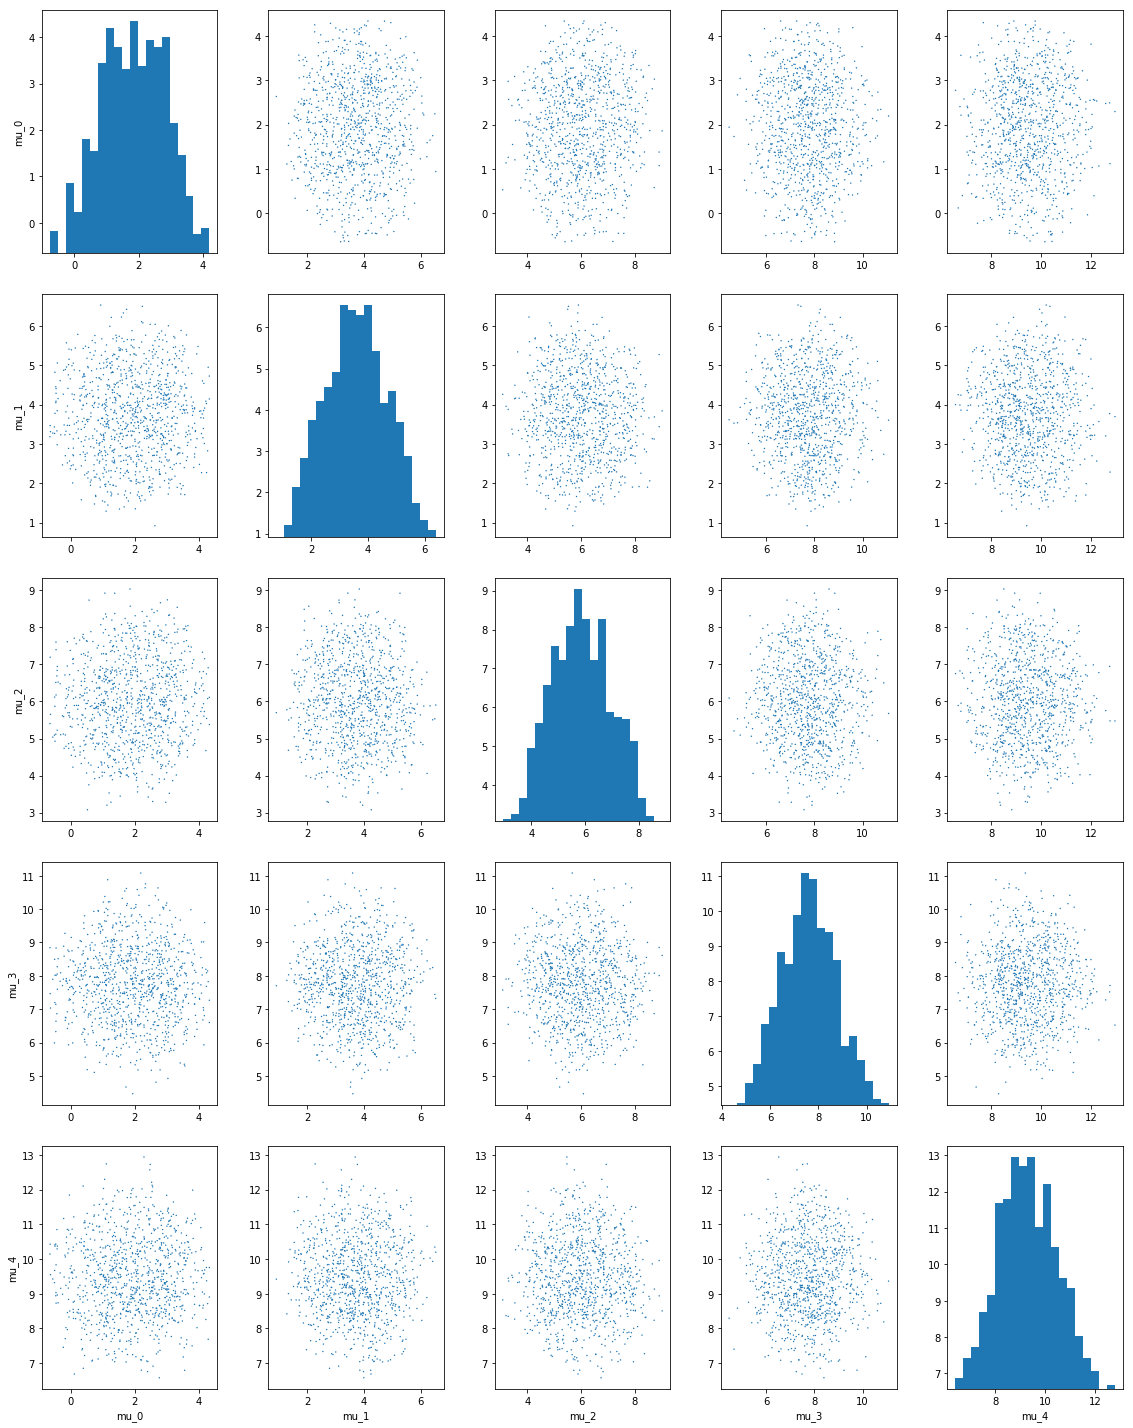

In [40]:
result_5d.plot_pairs()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f088f616198>,
      dtype=object)

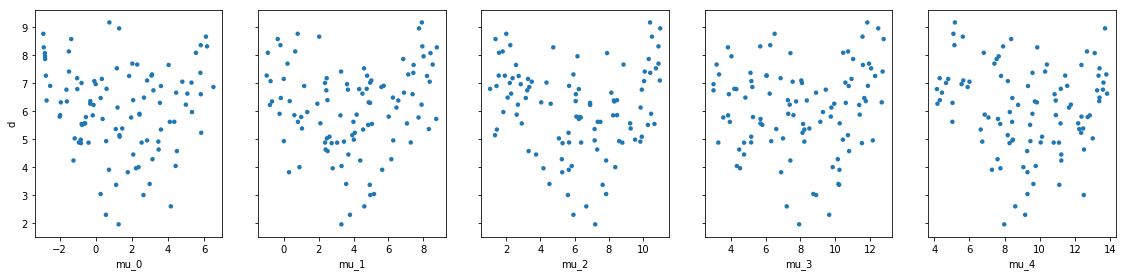

In [66]:
elfi.plot_params_vs_node(m_5d['d'])

### Plotting 6-D Gaussian model

In [41]:
true_mu_6d = [2, 4, 6, 8, 9, 3]
cov_matrix_6d = [1, 3, 5, 7, 10, 7]

In [42]:
m_6d = get_model(true_params=true_mu_6d, nd_mean=True, cov_matrix=cov_matrix_6d, seed_obs=seed)

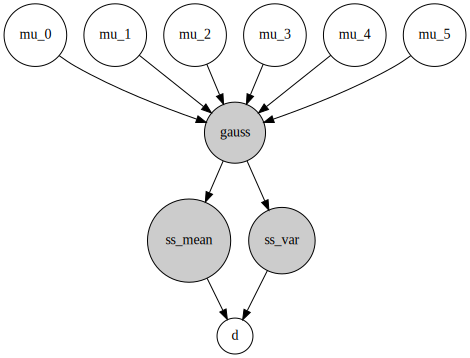

In [43]:
elfi.draw(m_6d['d'])

In [44]:
rej_6d = elfi.Rejection(m_6d['d'], batch_size=N, seed=seed)

In [45]:
result_6d = rej_6d.sample(N)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f08c4b0e5c0>,
      dtype=object)

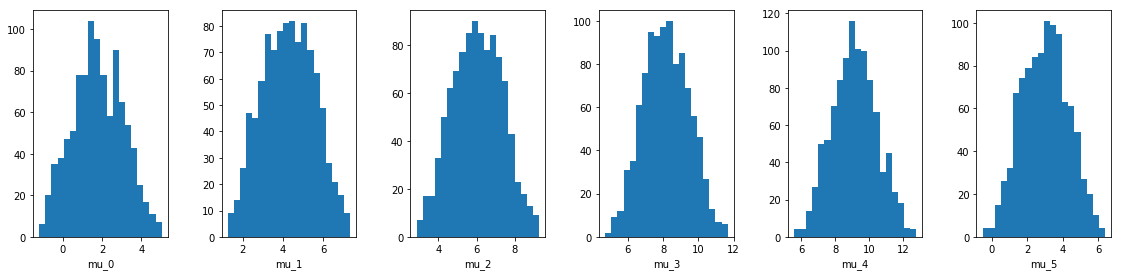

In [46]:
result_6d.plot_marginals()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08c51e76a0>,
      dtype=object)

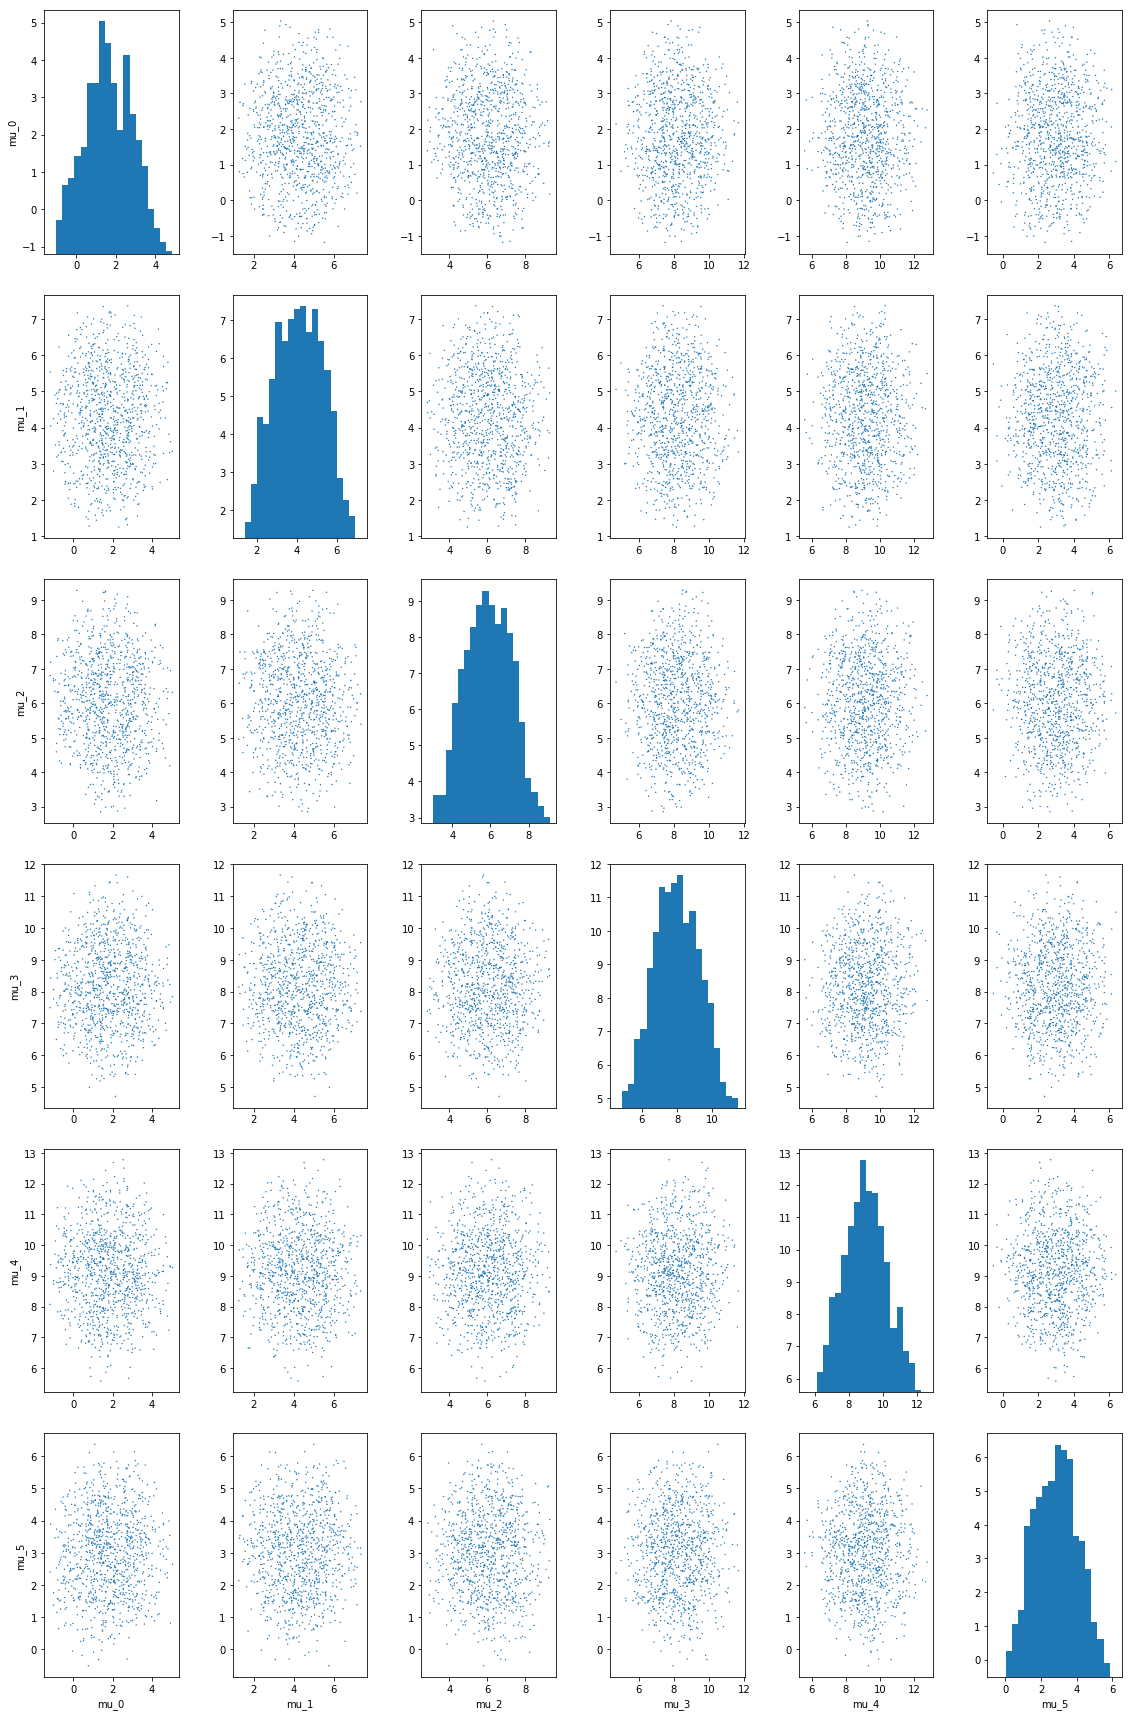

In [47]:
result_6d.plot_pairs()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f088f4b5240>,
      dtype=object)

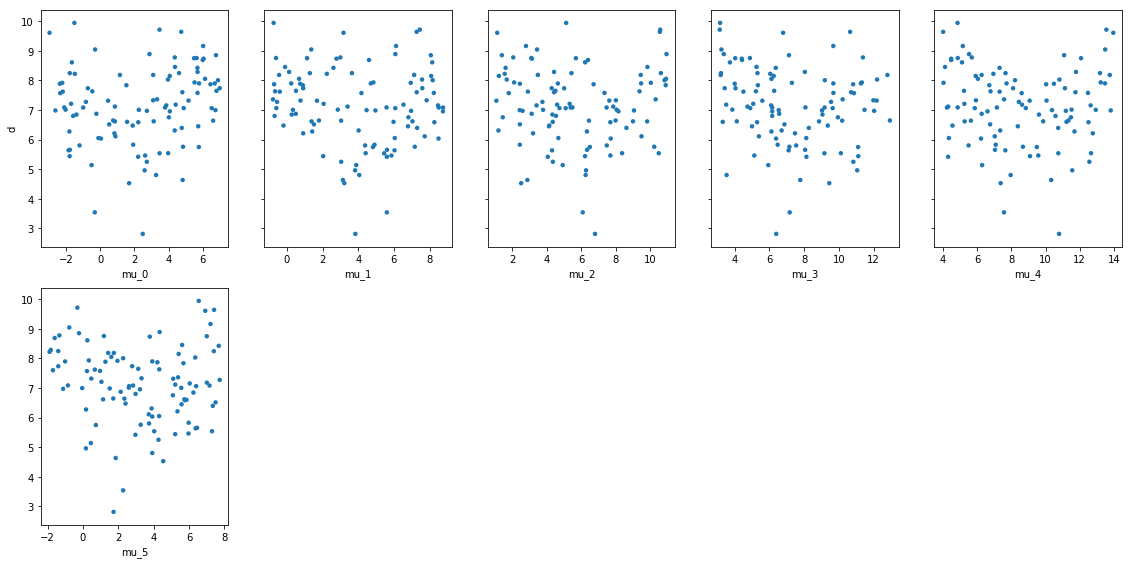

In [67]:
elfi.plot_params_vs_node(m_6d['d'])

### Plotting 7-D Gaussian model

In [48]:
true_mu_7d = [2, 4, 6, 8, 9, 3, 1]
cov_matrix_7d = [1, 3, 5, 7, 10, 7, 2]

In [49]:
m_7d = get_model(true_params=true_mu_7d, nd_mean=True, cov_matrix=cov_matrix_7d, seed_obs=seed)

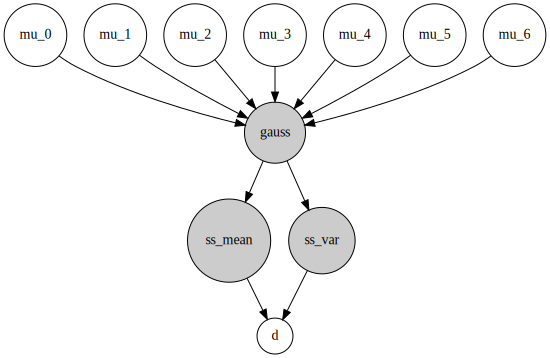

In [50]:
elfi.draw(m_7d['d'])

In [51]:
rej_7d = elfi.Rejection(m_7d['d'], batch_size=N, seed=seed)

In [52]:
result_7d = rej_7d.sample(N)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f08951ee4a8>,
      dtype=object)

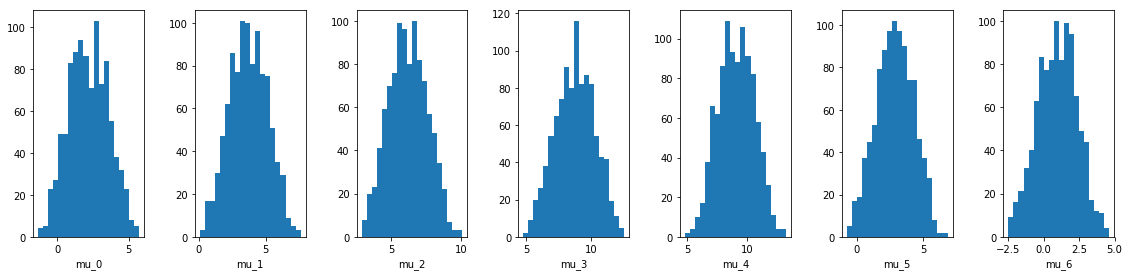

In [53]:
result_7d.plot_marginals()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08a01ae278>,
      dtype=object)

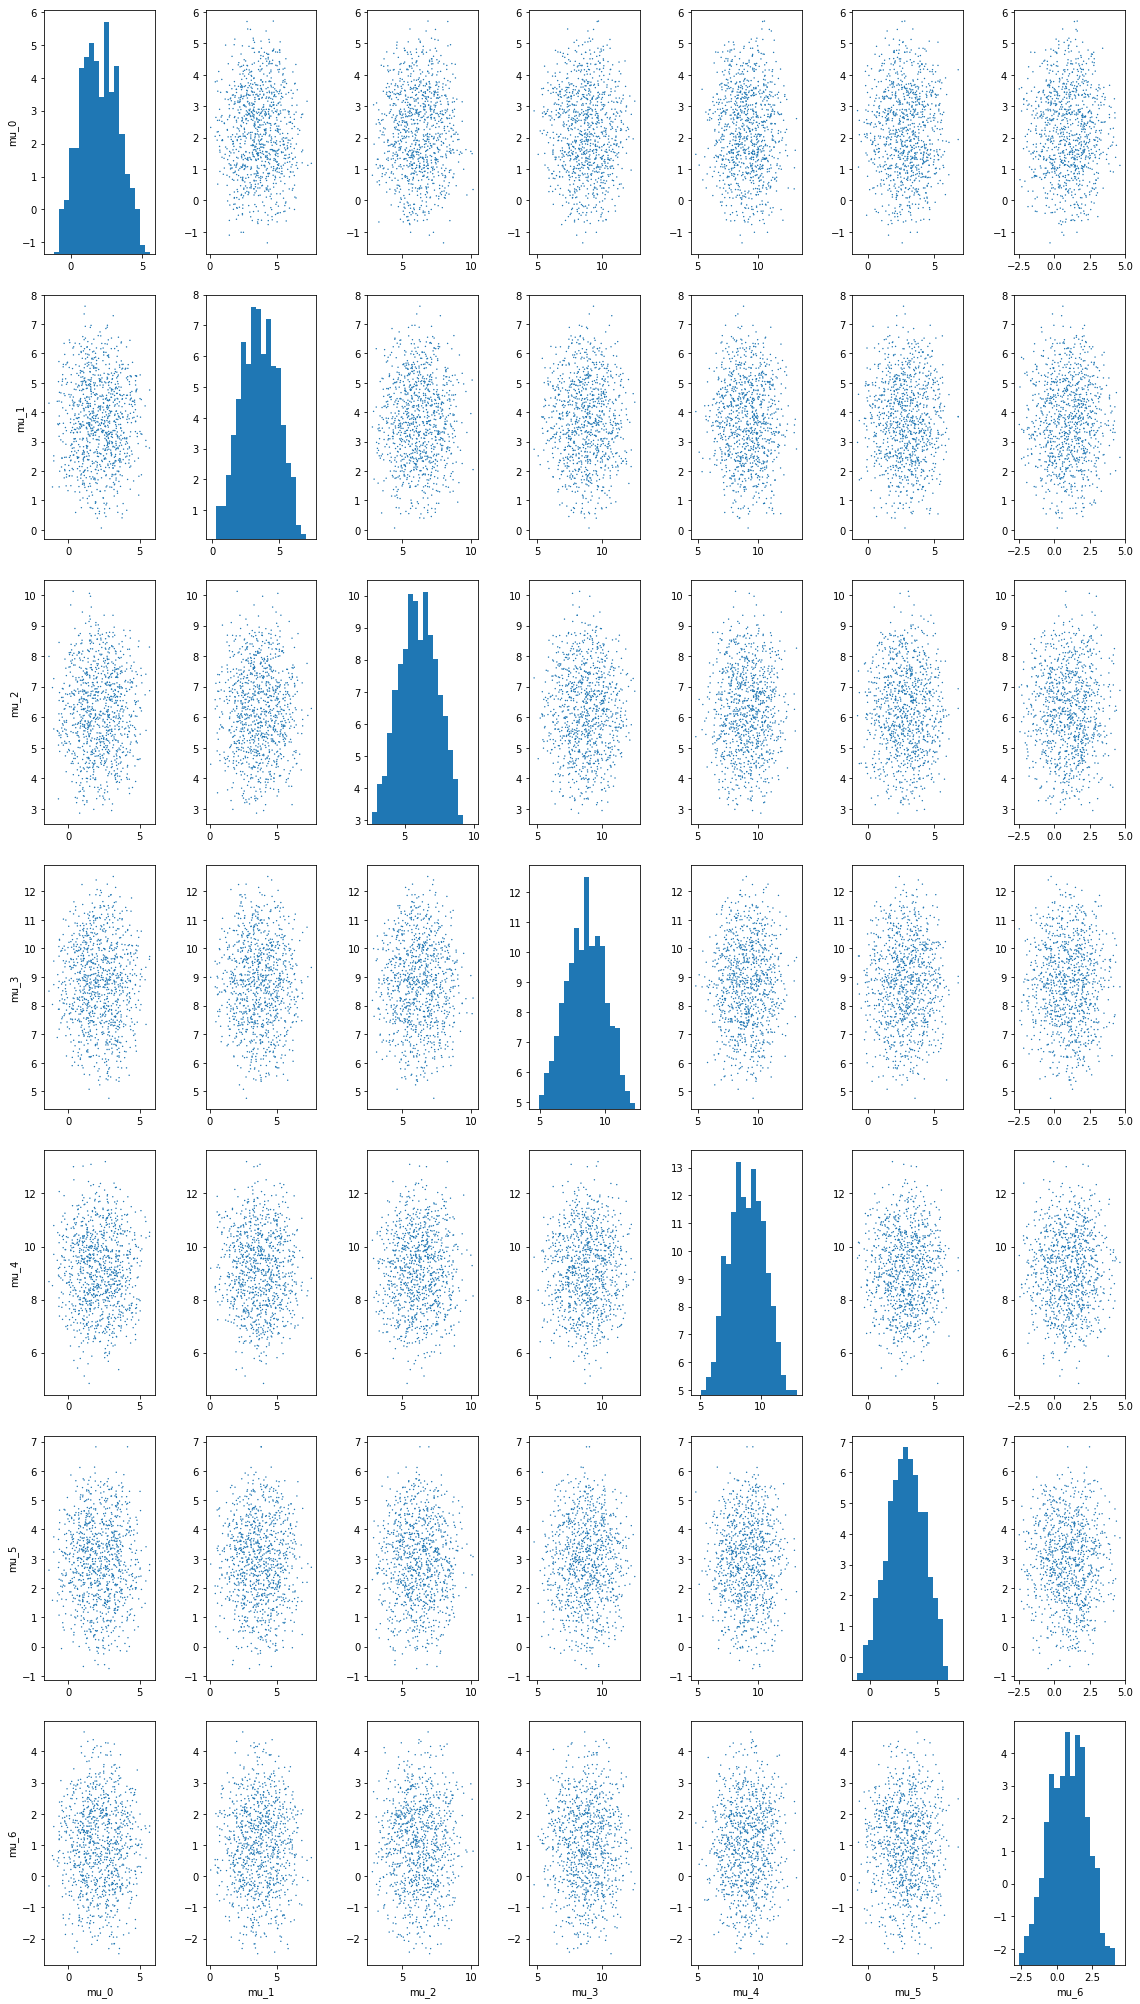

In [54]:
result_7d.plot_pairs()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f088f2329b0>,
      dtype=object)

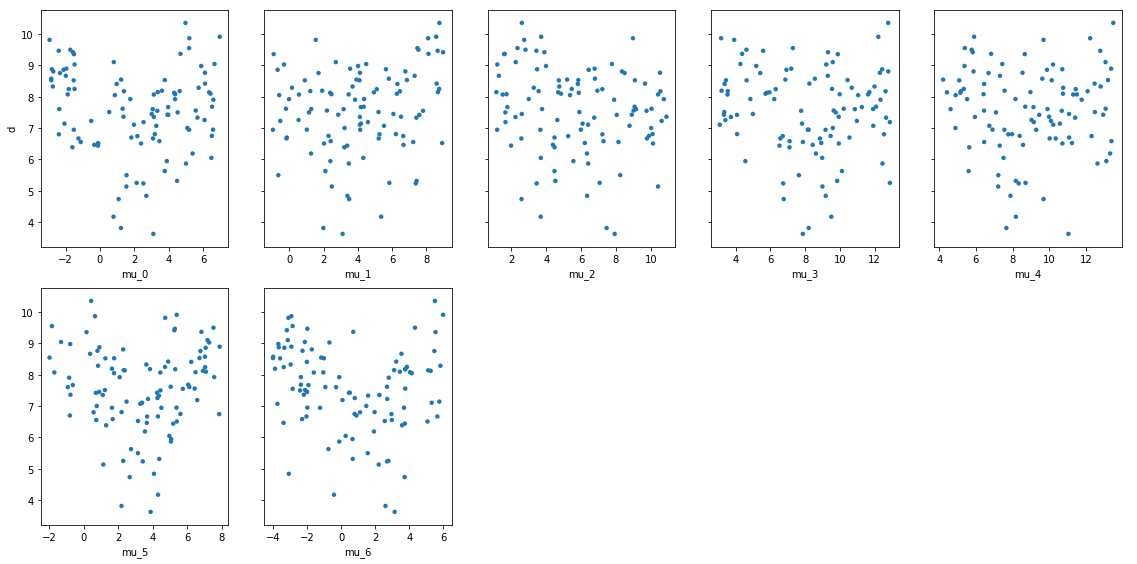

In [68]:
elfi.plot_params_vs_node(m_7d['d'])

### Plotting 8-D Gaussian model

In [55]:
true_mu_8d = [2, 4, 6, 8, 9, 3, 1, 10]
cov_matrix_8d = [1, 3, 5, 7, 10, 7, 2, 4]

In [56]:
m_8d= get_model(true_params=true_mu_8d, nd_mean=True, cov_matrix=cov_matrix_8d, seed_obs=seed)

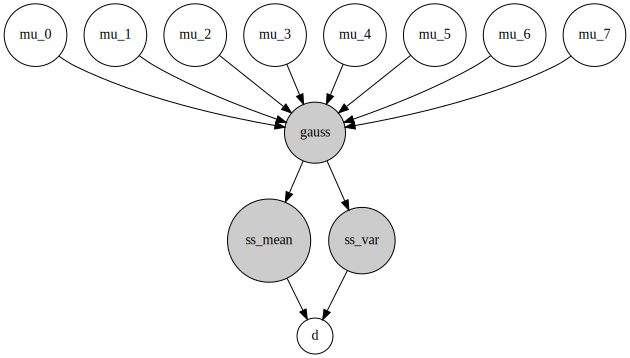

In [57]:
elfi.draw(m_8d['d'])

In [58]:
rej_8d = elfi.Rejection(m_8d['d'], batch_size=N, seed=seed)

In [59]:
result_8d = rej_8d.sample(N)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0892f70860>,
      dtype=object)

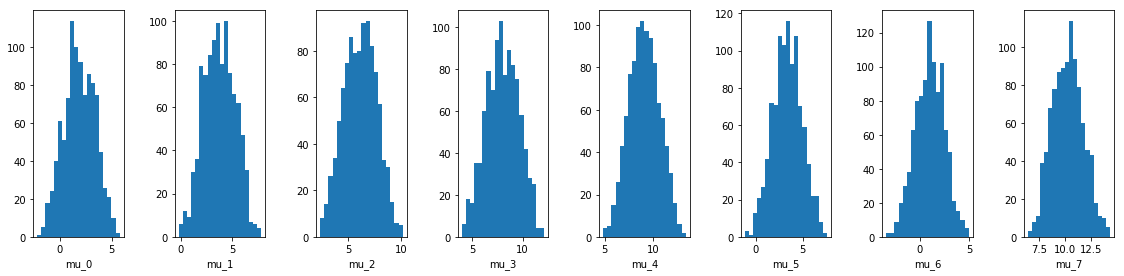

In [60]:
result_8d.plot_marginals()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08c59d9dd8>,
      dtype=object)

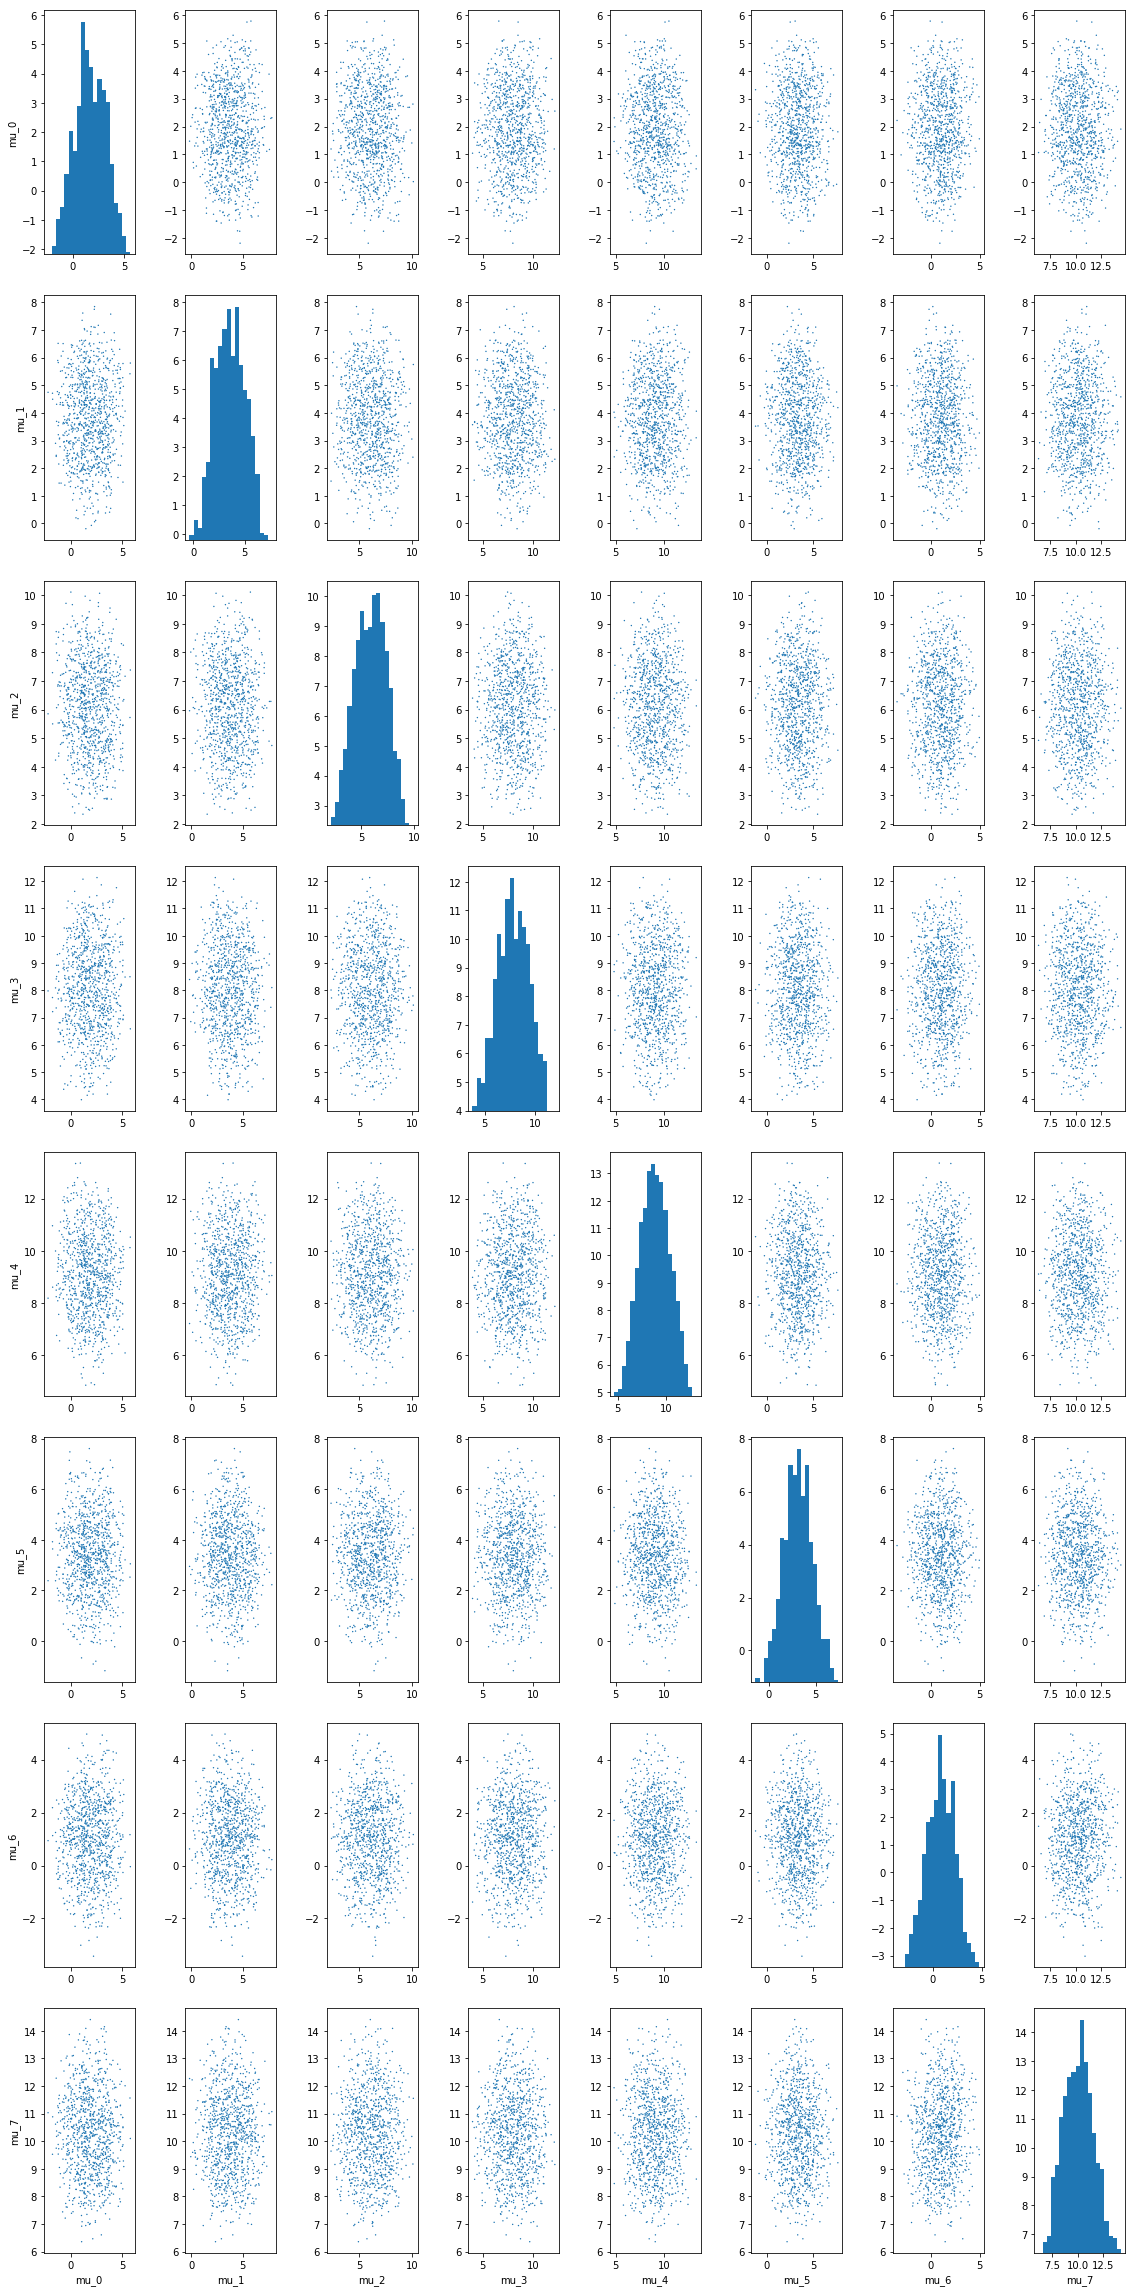

In [61]:
result_8d.plot_pairs()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f088ee73cf8>,
      dtype=object)

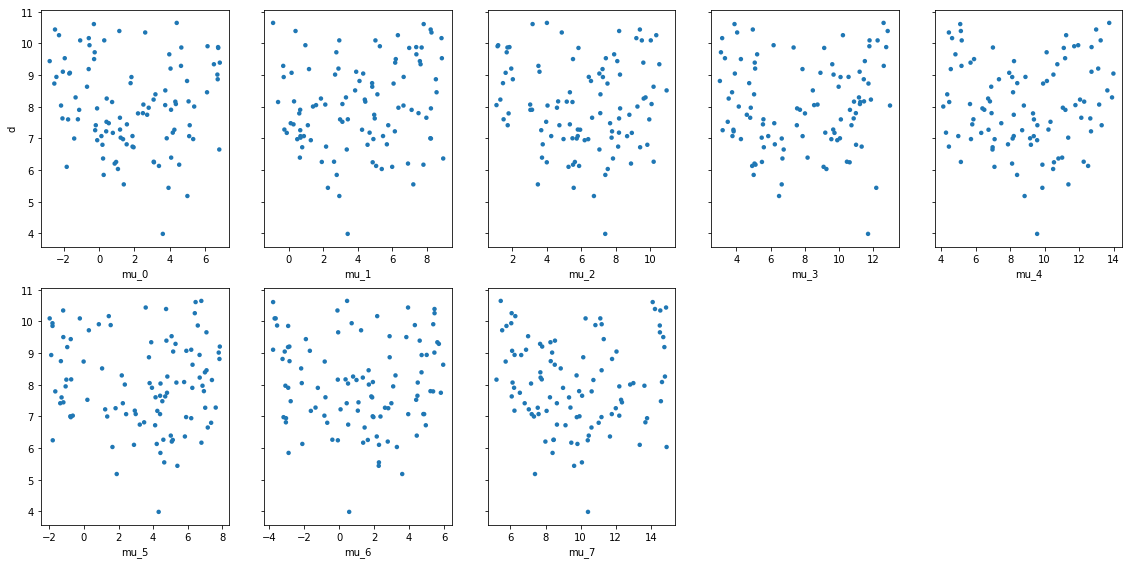

In [69]:
elfi.plot_params_vs_node(m_8d['d'])